In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

Downloading Data

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-09-06 06:06:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2021-09-06 06:06:24 (1.10 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Reading Data into the platform

In [3]:
data=pd.read_csv("FuelConsumption.csv")

In [4]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


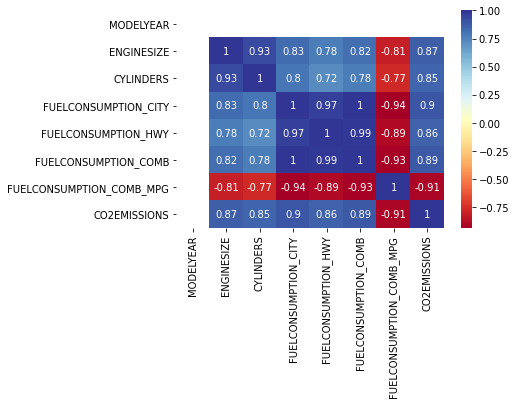

In [18]:
import seaborn as sns
sns.heatmap(data.corr(),cmap="RdYlBu",annot=True)
plt.show()

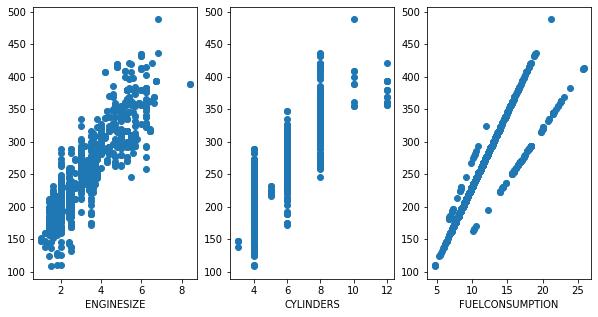

In [25]:
fig,ax=plt.subplots(1,3,figsize=(10,5))
ax[0].scatter(data.ENGINESIZE,data.CO2EMISSIONS)
ax[0].set_xlabel("ENGINESIZE")
ax[1].scatter(data.CYLINDERS,data.CO2EMISSIONS)
ax[1].set_xlabel("CYLINDERS")
ax[2].scatter(data.FUELCONSUMPTION_COMB,data.CO2EMISSIONS)
ax[2].set_xlabel("FUELCONSUMPTION")
plt.show()

Splitting the data

In [27]:
mask=np.random.rand(len(data)) <0.8
train=data[mask]
test=data[~mask]

TRAINING THE MODEL

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x_train=np.asanyarray(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
y_train=np.asanyarray(train[["CO2EMISSIONS"]])

In [33]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred=lr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

In [37]:
print(lr.coef_)
print(lr.intercept_)

[[11.56030536  6.70728927  9.73373681]]
[65.74976986]


In [42]:
x_test=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test=np.asanyarray(test[["CO2EMISSIONS"]])
print("Residual_sum_of squares:",sum((y_test-y_pred)**2) / len(test))

Residual_sum_of squares: [612.52752395]


In [49]:
print('Variance score: %.2f' % lr.score(x_test, y_test))

Variance score: 0.86
